# Breast-Cancer-Screening-DBT | Breast Cancer Screening - Digital Breast Tomosynthesis

- cranial-caudal (CC)
- middle-lateral-oblique (MLO) 

## Setup Environment

In [1]:
!pip install pydicom pandas numpy matplotlib scikit-image pylibjpeg pylibjpeg-openjpeg

Use the following directory structure to follow along more easily.
All data will live inside the tmp directory.
The initial_data directory will hold the .tcia files used to download the DICOMs.
Each group of img data will live inside it's corresponding group data, test, train, validation.

tmp
├── initial_data
├── test
│   ├── imgs
│   └── manifest-1617905855234
├── train
│   ├── imgs
│   └── manifest-1617905855234
└── validation
    ├── imgs
    └── manifest-1617905855234

In [10]:
import os
import sys

parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
data_set_file_path = "../tmp/train/BCS-DBT-file-paths-train-v2.csv"
set_type = 'train'
sys.path.append(parent_dir)

In [3]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

from src.dcm_reader import view_image

### Fix paths

The paths provided in `BCS-DBT-file-paths-train-v2.csv` are incorrect.

Here's the file

```csv
PatientID,StudyUID,View,descriptive_path,classic_path
DBT-P00003,DBT-S01306,lcc,Breast-Cancer-Screening-DBT/DBT-P00003/01-01-2000-DBT-S01306-MAMMO screening digital bilateral-33603/18377.000000/1-1.dcm,Breast-Cancer-Screening-DBT/DBT-P00003/1.2.826.0.1.3680043.8.498.11064681320360484395560513758496633603/1.2.826.0.1.3680043.8.498.27223707549009748622583012367967892351/1-1.dcm
...
```

Specifically the descriptive_path's 2nd to last dir, in this example row '18377.000000', it's missing a 'NA-********'. 
Fix it by running this script.

```sh
python src/data_prep.py train cleanse_data
```

## View Dicoms

In [5]:
import os

current_directory = os.getcwd()
print("Current working directory:", current_directory)
df = pd.read_csv(data_set_file_path)

Current working directory: /Users/future/Documents/Work/_Main/.Projects/duke-dbt-data/notebooks


Loading file: ../tmp/train/manifest-1617905855234/Breast-Cancer-Screening-DBT/DBT-P00003/01-01-2000-DBT-S01306-MAMMO screening digital bilateral-33603/18377.000000-NA-92351/1-1.dcm


/opt/anaconda3/lib/python3.11/site-packages/openjpeg/utils.py:314: UserWarning: The (0028,0101) Bits Stored value '10' in the dataset does not match the component precision value '16' found in the JPEG 2000 data. It's recommended that you change the Bits Stored value to produce the correct output
  warnings.warn(


PatientId: DBT-P00003
View: lcc


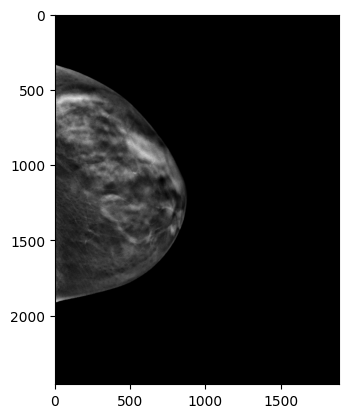

In [6]:
view_image(set_type, df, plt, 0)

Loading file: ../tmp/train/manifest-1617905855234/Breast-Cancer-Screening-DBT/DBT-P00003/01-01-2000-DBT-S01306-MAMMO screening digital bilateral-33603/18384.000000-NA-64500/1-1.dcm
PatientId: DBT-P00003
View: lmlo


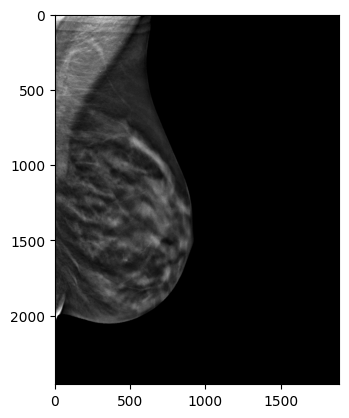

In [7]:
view_image(set_type, df, plt, 1)

Loading file: ../tmp/train/manifest-1617905855234/Breast-Cancer-Screening-DBT/DBT-P00003/01-01-2000-DBT-S01306-MAMMO screening digital bilateral-33603/18379.000000-NA-61347/1-1.dcm
PatientId: DBT-P00003
View: rcc


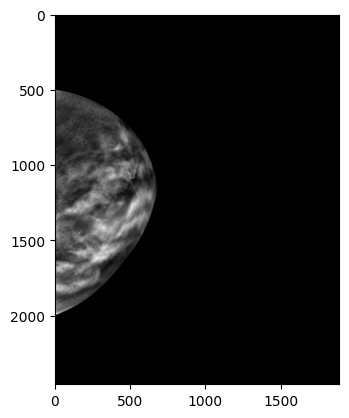

In [8]:
view_image(set_type, df, plt, 2)

Loading file: ../tmp/train/manifest-1617905855234/Breast-Cancer-Screening-DBT/DBT-P00003/01-01-2000-DBT-S01306-MAMMO screening digital bilateral-33603/18383.000000-NA-69977/1-1.dcm


/opt/anaconda3/lib/python3.11/site-packages/openjpeg/utils.py:314: UserWarning: The (0028,0101) Bits Stored value '10' in the dataset does not match the component precision value '16' found in the JPEG 2000 data. It's recommended that you change the Bits Stored value to produce the correct output
  warnings.warn(


PatientId: DBT-P00003
View: rmlo


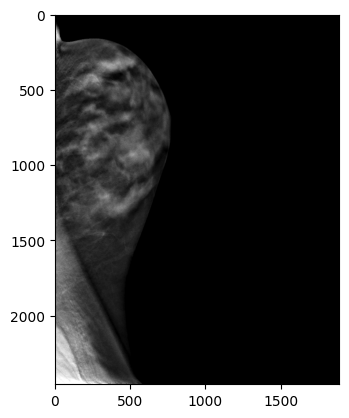

In [9]:
view_image(set_type, df, plt, 3)

## Cleanup 

## Data
Our data isn't consistent. Let's get a feel for

In [11]:
patient_counts = df['PatientID'].value_counts()
occurrence_counts = patient_counts.value_counts().sort_index()
print(occurrence_counts)


count
1      11
2      84
3       3
4    4264
Name: count, dtype: int64


In [20]:
patient_counts = df['PatientID'].value_counts()
patient_ids_with_4_occurrences = patient_counts[patient_counts == 4].index

print(len(patient_ids_with_4_occurrences))
print(patient_ids_with_4_occurrences)

4264
Index(['DBT-P00003', 'DBT-P03379', 'DBT-P03358', 'DBT-P03359', 'DBT-P03361',
       'DBT-P03362', 'DBT-P03363', 'DBT-P03364', 'DBT-P03365', 'DBT-P03367',
       ...
       'DBT-P01663', 'DBT-P01662', 'DBT-P01667', 'DBT-P01668', 'DBT-P01669',
       'DBT-P01671', 'DBT-P01857', 'DBT-P01661', 'DBT-P01660', 'DBT-P01659'],
      dtype='object', name='PatientID', length=4264)


## Generate PNGs

In [19]:
for _, patient_id in enumerate(patient_ids_with_4_occurrences):
  print(patient_id)
  view_image(set_type, df, plt, 1)

DBT-P00003
DBT-P03379
DBT-P03358
DBT-P03359
DBT-P03361
DBT-P03362
DBT-P03363
DBT-P03364
DBT-P03365
DBT-P03367
DBT-P03368
DBT-P03369
DBT-P03373
DBT-P03374
DBT-P03375
DBT-P03378
DBT-P03380
DBT-P03356
DBT-P03381
DBT-P03382
DBT-P03383
DBT-P03384
DBT-P03385
DBT-P03386
DBT-P03387
DBT-P03388
DBT-P03389
DBT-P03391
DBT-P03392
DBT-P03393
DBT-P03394
DBT-P03395
DBT-P03357
DBT-P03355
DBT-P03315
DBT-P03333
DBT-P03318
DBT-P03319
DBT-P03320
DBT-P03321
DBT-P03322
DBT-P03323
DBT-P03324
DBT-P03325
DBT-P03326
DBT-P03327
DBT-P03328
DBT-P03329
DBT-P03330
DBT-P03331
DBT-P03334
DBT-P03353
DBT-P03335
DBT-P03336
DBT-P03337
DBT-P03339
DBT-P03341
DBT-P03342
DBT-P03344
DBT-P03345
DBT-P03347
DBT-P03348
DBT-P03349
DBT-P03350
DBT-P03351
DBT-P03352
DBT-P03396
DBT-P03397
DBT-P03399
DBT-P03452
DBT-P03437
DBT-P03438
DBT-P03439
DBT-P03440
DBT-P03441
DBT-P03442
DBT-P03443
DBT-P03444
DBT-P03445
DBT-P03446
DBT-P03447
DBT-P03449
DBT-P03450
DBT-P03451
DBT-P03453
DBT-P03400
DBT-P03454
DBT-P03455
DBT-P03456
DBT-P03457
DBT-P03459